## Regression analysis to predict effect of Unmet Access to Contraception on International Adoption Rate using Ski-kit learn
##### Unmet Access to Contraception is defined as the percentage of women who cannot access contraception in a given location
##### International Adoption Rate is expressed as a raw number per year 

In [1]:
# Import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
c_access_colombia = pd.read_csv('Resources/colombia_fake.csv')
c_access_colombia

,Year,Unmet,Adoptions
0,1986,13.5,55
1,1990,13.7,76
2,1992,18.1,200
3,1994,12.0,400
4,1996,9.0,800
5,1998,12.0,499
6,1999,13.0,234
7,2000,11.4,350
8,2003,10.0,245
9,2007,8.6,1749


In [3]:
c_access_colombia.columns


Index(['Year', 'Unmet', 'Adoptions'], dtype='object')

In [4]:
#X = brains["weight"].values.reshape(-1, 1)
#y = brains["size"].values.reshape(-1, 1)



# Assign the data to X and y
X = c_access_colombia["Unmet"].values.reshape(-1,1)
# y is what i am trying to predict ************CHANGE 
y = c_access_colombia["Adoptions"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (11, 1) (11, 1)


Text(0,0.5,'Adoptions')

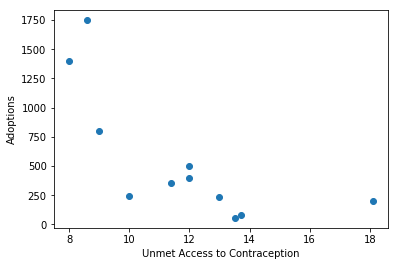

In [5]:
plt.scatter(X, y)
plt.xlabel("Unmet Access to Contraception")
plt.ylabel("Adoptions")

In [8]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [9]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-96.02159704]]
y-axis intercept:  [1606.15700483]


In [12]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[8.]]
Max X Value: [[18.1]]


In [13]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [14]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score


# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 335077.40527639614
R-squared (R2 ): 0.34855920164389453


In [ ]:
plt.scatter(X, y, c='blue')
plt.xlabel("Unmet Access to Contraception")
plt.ylabel("Adoptions")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [ ]:

 
#print(f"Training Score: {training_score}")
#print(f"Testing Score: {testing_score}")
# closer to one = higher predictive value 
# more features = closer the prediction can be 

In [ ]:
# blue is actual data? 
# yellow testing data contains what we are trying to predict? 
# model.fit 